**Using Random Forest regressor**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
path = r'C:\Users\User\dev\training_model\dataset\gold_data_20_y_cleaned.csv'

df = pd.read_csv(path, parse_dates=['Date'])
df = df.sort_values("Date")

df.head()

,Unnamed: 0,Date,IR14270,Open,High,Low,Close,Volume,CPIAUCSL,FEDFUNDS,Open sp500,High sp500,Low sp500,Close sp500,Volume sp500,Open usd_index,High usd_index,Low usd_index,Close usd_index
0,52,2000-08-30,10.4,273.899994,273.899994,273.899994,273.899994,0.0,172.7,6.50,1509.839966,1510.489990,1500.089966,1502.589966,8.184000e+08,112.190002,112.779999,112.110001,112.139999
1,53,2000-08-31,10.4,274.799988,278.299988,274.799988,278.299988,0.0,172.7,6.50,1502.589966,1525.209961,1502.589966,1517.680054,1.056600e+09,111.980003,112.930000,111.779999,112.599998
2,54,2000-09-01,10.2,277.000000,277.000000,277.000000,277.000000,0.0,173.6,6.52,1517.680054,1530.089966,1515.530029,1520.770020,7.677000e+08,112.360001,112.599998,111.250000,111.419998
3,55,2000-09-05,10.2,275.799988,275.799988,275.799988,275.799988,2.0,173.6,6.52,1520.770020,1520.770020,1504.209961,1507.079956,8.385000e+08,111.610001,112.769997,111.500000,112.410004
4,56,2000-09-06,10.2,274.200012,274.200012,274.200012,274.200012,0.0,173.6,6.52,1507.079956,1512.609985,1492.119995,1492.250000,9.951000e+08,112.449997,114.239998,112.320000,114.120003


In [4]:
df = df.drop(columns='Unnamed: 0')

In [5]:
df.head()

,Date,IR14270,Open,High,Low,Close,Volume,CPIAUCSL,FEDFUNDS,Open sp500,High sp500,Low sp500,Close sp500,Volume sp500,Open usd_index,High usd_index,Low usd_index,Close usd_index
0,2000-08-30,10.4,273.899994,273.899994,273.899994,273.899994,0.0,172.7,6.50,1509.839966,1510.489990,1500.089966,1502.589966,8.184000e+08,112.190002,112.779999,112.110001,112.139999
1,2000-08-31,10.4,274.799988,278.299988,274.799988,278.299988,0.0,172.7,6.50,1502.589966,1525.209961,1502.589966,1517.680054,1.056600e+09,111.980003,112.930000,111.779999,112.599998
2,2000-09-01,10.2,277.000000,277.000000,277.000000,277.000000,0.0,173.6,6.52,1517.680054,1530.089966,1515.530029,1520.770020,7.677000e+08,112.360001,112.599998,111.250000,111.419998
3,2000-09-05,10.2,275.799988,275.799988,275.799988,275.799988,2.0,173.6,6.52,1520.770020,1520.770020,1504.209961,1507.079956,8.385000e+08,111.610001,112.769997,111.500000,112.410004
4,2000-09-06,10.2,274.200012,274.200012,274.200012,274.200012,0.0,173.6,6.52,1507.079956,1512.609985,1492.119995,1492.250000,9.951000e+08,112.449997,114.239998,112.320000,114.120003


In [6]:
df.columns

Index(['Date', 'IR14270', 'Open', 'High', 'Low', 'Close', 'Volume', 'CPIAUCSL',
       'FEDFUNDS', 'Open sp500', 'High sp500', 'Low sp500', 'Close sp500',
       'Volume sp500', 'Open usd_index', 'High usd_index', 'Low usd_index',
       'Close usd_index'],
      dtype='object')

In [7]:
drop = ['Volume', 'Open sp500', 'High sp500', 'Low sp500', 'Volume sp500', 'Open usd_index', 'High usd_index', 'Low usd_index']

df = df.drop(columns=drop)

In [8]:
df.head()

,Date,IR14270,Open,High,Low,Close,CPIAUCSL,FEDFUNDS,Close sp500,Close usd_index
0,2000-08-30,10.4,273.899994,273.899994,273.899994,273.899994,172.7,6.50,1502.589966,112.139999
1,2000-08-31,10.4,274.799988,278.299988,274.799988,278.299988,172.7,6.50,1517.680054,112.599998
2,2000-09-01,10.2,277.000000,277.000000,277.000000,277.000000,173.6,6.52,1520.770020,111.419998
3,2000-09-05,10.2,275.799988,275.799988,275.799988,275.799988,173.6,6.52,1507.079956,112.410004
4,2000-09-06,10.2,274.200012,274.200012,274.200012,274.200012,173.6,6.52,1492.250000,114.120003


In [9]:
df = df.rename(columns={"Close sp500": "SPX", "Close usd_index": "USD_index"})

In [10]:
df

,Date,IR14270,Open,High,Low,Close,CPIAUCSL,FEDFUNDS,SPX,USD_index
0,2000-08-30,10.4,273.899994,273.899994,273.899994,273.899994,172.70,6.50,1502.589966,112.139999
1,2000-08-31,10.4,274.799988,278.299988,274.799988,278.299988,172.70,6.50,1517.680054,112.599998
2,2000-09-01,10.2,277.000000,277.000000,277.000000,277.000000,173.60,6.52,1520.770020,111.419998
3,2000-09-05,10.2,275.799988,275.799988,275.799988,275.799988,173.60,6.52,1507.079956,112.410004
4,2000-09-06,10.2,274.200012,274.200012,274.200012,274.200012,173.60,6.52,1492.250000,114.120003
...,...,...,...,...,...,...,...,...,...,...
6214,2025-06-13,128.6,3407.300049,3444.000000,3407.300049,3431.199951,320.58,4.33,5976.970215,98.180000
6215,2025-06-16,128.6,3442.000000,3442.000000,3385.399902,3396.399902,320.58,4.33,6033.109863,98.000000
6216,2025-06-17,128.6,3398.300049,3398.300049,3376.100098,3386.600098,320.58,4.33,5982.720215,98.820000
6217,2025-06-18,128.6,3385.300049,3391.899902,3365.100098,3389.800049,320.58,4.33,5980.870117,98.910004


In [12]:
df = df.query("Date >= '2015-01-01'")

In [13]:
df.head()

,Date,IR14270,Open,High,Low,Close,CPIAUCSL,FEDFUNDS,SPX,USD_index
3590,2015-01-02,45.8,1184.000000,1194.500000,1169.500000,1186.000000,234.747,0.11,2058.199951,91.080002
3591,2015-01-05,45.8,1180.300049,1206.900024,1180.099976,1203.900024,234.747,0.11,2020.579956,91.379997
3592,2015-01-06,45.8,1203.500000,1220.000000,1203.500000,1219.300049,234.747,0.11,2002.609985,91.500000
3593,2015-01-07,45.8,1219.199951,1219.199951,1210.599976,1210.599976,234.747,0.11,2025.900024,91.889999
3594,2015-01-08,45.8,1207.000000,1215.699951,1206.300049,1208.400024,234.747,0.11,2062.139893,92.370003


In [14]:
len(df)

2629

In [15]:
df['Target'] = df['Close'].shift(-1)

C:\Users\User\AppData\Local\Temp\ipykernel_8696\1104530230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Close'].shift(-1)


In [16]:
df

,Date,IR14270,Open,High,Low,Close,CPIAUCSL,FEDFUNDS,SPX,USD_index,Target
3590,2015-01-02,45.8,1184.000000,1194.500000,1169.500000,1186.000000,234.747,0.11,2058.199951,91.080002,1203.900024
3591,2015-01-05,45.8,1180.300049,1206.900024,1180.099976,1203.900024,234.747,0.11,2020.579956,91.379997,1219.300049
3592,2015-01-06,45.8,1203.500000,1220.000000,1203.500000,1219.300049,234.747,0.11,2002.609985,91.500000,1210.599976
3593,2015-01-07,45.8,1219.199951,1219.199951,1210.599976,1210.599976,234.747,0.11,2025.900024,91.889999,1208.400024
3594,2015-01-08,45.8,1207.000000,1215.699951,1206.300049,1208.400024,234.747,0.11,2062.139893,92.370003,1216.000000
...,...,...,...,...,...,...,...,...,...,...,...
6214,2025-06-13,128.6,3407.300049,3444.000000,3407.300049,3431.199951,320.580,4.33,5976.970215,98.180000,3396.399902
6215,2025-06-16,128.6,3442.000000,3442.000000,3385.399902,3396.399902,320.580,4.33,6033.109863,98.000000,3386.600098
6216,2025-06-17,128.6,3398.300049,3398.300049,3376.100098,3386.600098,320.580,4.33,5982.720215,98.820000,3389.800049
6217,2025-06-18,128.6,3385.300049,3391.899902,3365.100098,3389.800049,320.580,4.33,5980.870117,98.910004,3368.100098


In [17]:
df = df.drop(columns=['Close'])

df = df.dropna()

In [18]:
df.head()

,Date,IR14270,Open,High,Low,CPIAUCSL,FEDFUNDS,SPX,USD_index,Target
3590,2015-01-02,45.8,1184.000000,1194.500000,1169.500000,234.747,0.11,2058.199951,91.080002,1203.900024
3591,2015-01-05,45.8,1180.300049,1206.900024,1180.099976,234.747,0.11,2020.579956,91.379997,1219.300049
3592,2015-01-06,45.8,1203.500000,1220.000000,1203.500000,234.747,0.11,2002.609985,91.500000,1210.599976
3593,2015-01-07,45.8,1219.199951,1219.199951,1210.599976,234.747,0.11,2025.900024,91.889999,1208.400024
3594,2015-01-08,45.8,1207.000000,1215.699951,1206.300049,234.747,0.11,2062.139893,92.370003,1216.000000


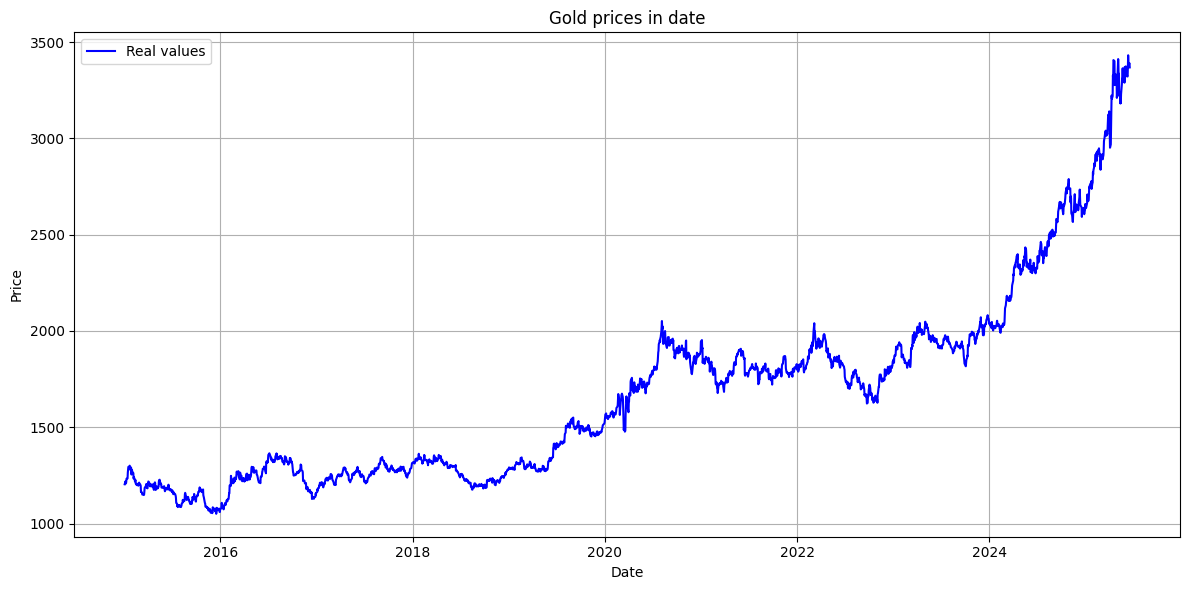

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Target'], label='Real values', color='blue')

plt.title('Gold prices in date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
X = df.drop(columns=['Target', 'Date'])
y = df['Target'].values.reshape(-1, 1)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

split_index = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

In [35]:
model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

c:\Users\User\dev\training_model\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\dev\training_model\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


R² Score: -0.8181
Mean Squared Error: 0.0626


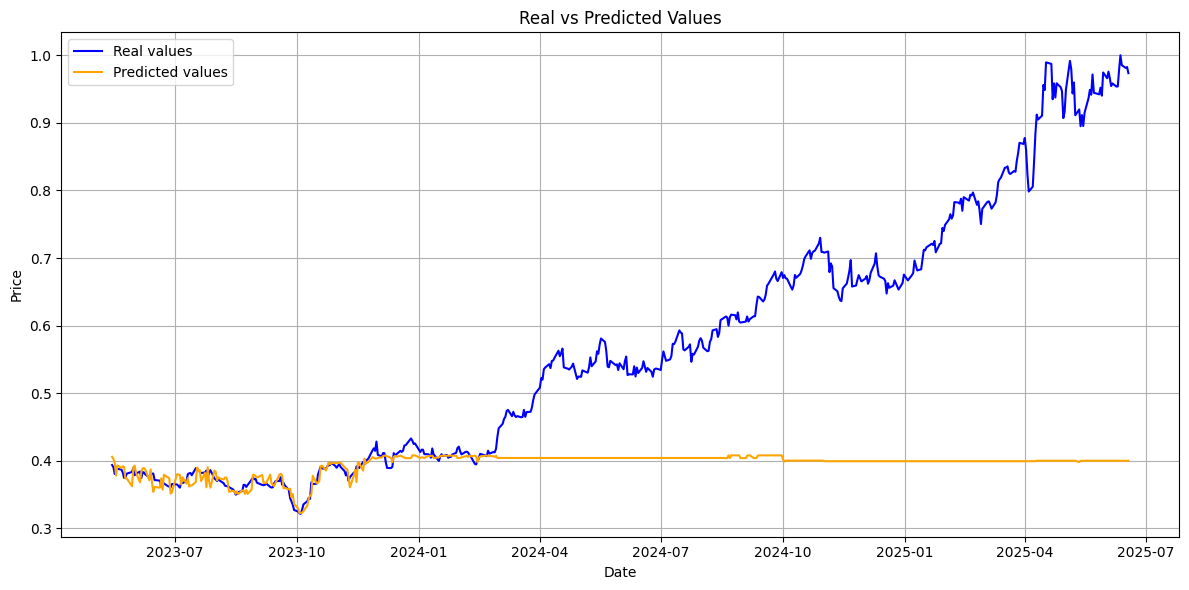

In [36]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

df['Date'] = pd.to_datetime(df['Date'])

date_test = df['Date'].iloc[split_index:]

plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label='Real values', color='blue')
plt.plot(date_test, y_pred, label='Predicted values', color='orange')

plt.title('Real vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
#---    TRAIN WITH SMALLER DIMENSNIONED DATASET

**USING SMALLER DATASET**

In [38]:
path = r'C:\Users\User\dev\training_model\dataset\modified_financial_data.csv'
df = pd.read_csv(path)

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ^GSPC     2513 non-null   float64       
 1   GLD       2513 non-null   float64       
 2   USO       2513 non-null   float64       
 3   SLV       2513 non-null   float64       
 4   EURUSD=X  2513 non-null   float64       
 5   Date      2513 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.9 KB


In [40]:
target = ['GLD']
features = [col for col in df.columns if col not in ['Date', target]]

X = df[features]
y = df[target]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

split_index = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

c:\Users\User\dev\training_model\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\dev\training_model\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


R² Score: 0.0419
Mean Squared Error: 0.0248


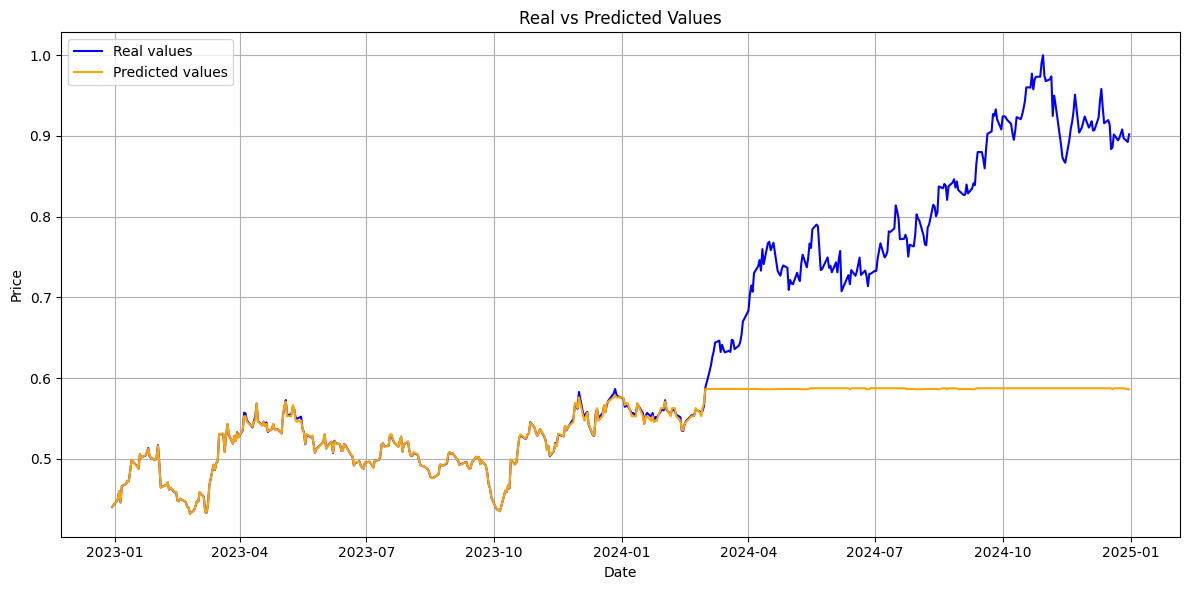

In [41]:
model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

df['Date'] = pd.to_datetime(df['Date'])

date_test = df['Date'].iloc[split_index:]

plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label='Real values', color='blue')
plt.plot(date_test, y_pred, label='Predicted values', color='orange')

plt.title('Real vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()